# Sea ice cover agreement (in the form of heatmaps)

## Objective 

The objective of this notebook is to create maps which show the snow cover agreement of all the models by counting at each grid point how much models simulate sea ice. This procedure create some heatmaps and help to identify visually the number of models which have a bad simulation of the sea ice. 

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-07-30T14:59:47.534326+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-63-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import sys
import os

# Absolute path to the folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# adding the path to sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Projet root ajouté au path:", project_root)

Projet root ajouté au path: /home/jovyan/M2_SeaIce_project


In [3]:
from module import *

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [4]:
%watermark --iversions

cartopy   : 0.24.0
skimage   : 0.25.0
matplotlib: 3.10.0
netCDF4   : 1.7.2
numpy     : 2.0.2
cdo       : 1.6.1
csv       : 1.0
sys       : 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:24:40) [GCC 13.3.0]
pandas    : 2.2.3
xesmf     : 0.8.8
seaborn   : 0.13.2
watermark : 2.5.0
xarray    : 2025.1.1



### List of files used

In [5]:
# Display files as a list
files = os.listdir("/home/jovyan/private-storage/output_data/sea_ice_interp_new/")

nc_files = [filename for filename in files if filename.endswith(".nc")]
nc_files

['BCC-CSM2-MR_hist_reprojete.nc',
 'CAMS-CSM1-0_hist_reprojete.nc',
 'CESM2_hist_reprojete.nc',
 'CESM2-WACCM_hist_reprojete.nc',
 'CNRM-CM6-1_hist_reprojete.nc',
 'CNRM-CM6-1-HR_hist_reprojete.nc',
 'CanESM5_hist_reprojete.nc',
 'FGOALS-f3-L_hist_reprojete.nc',
 'FIO-ESM-2-0_hist_reprojete.nc',
 'GFDL-CM4_hist_reprojete.nc',
 'GFDL-ESM4_hist_reprojete.nc',
 'INM-CM4-8_hist_reprojete.nc',
 'INM-CM5-0_hist_reprojete.nc',
 'IPSL-CM6A-LR_hist_reprojete.nc',
 'MIROC-ES2L_hist_reprojete.nc',
 'MIROC6_hist_reprojete.nc',
 'MPI-ESM1-2-HR_hist_reprojete.nc',
 'MRI-ESM2-0_hist_reprojete.nc',
 'NESM3_hist_reprojete.nc',
 'ACCESS-CM2_hist_reprojete.nc',
 'ACCESS-ESM1-5_hist_reprojete.nc',
 'CanESM5-CanOE_hist_reprojete.nc',
 'CAS-ESM2-0_hist_reprojete.nc',
 'CMCC-CM2-SR5_hist_reprojete.nc',
 'CNRM-ESM2-1_hist_reprojete.nc',
 'E3SM-1-1_hist_reprojete.nc',
 'EC-Earth3_hist_reprojete.nc',
 'EC-Earth3-Veg_hist_reprojete.nc',
 'EC-Earth3-Veg-LR_hist_reprojete.nc',
 'FGOALS-g3_hist_reprojete.nc',
 'Had

### Sea ice reference

In [7]:
# path and file of the sea ice reference
path = "/home/jovyan/M2_SeaIce_project/Data/input_data/sea_ice_ref3.nc"
sea_ice_ref = xr.open_dataarray(path)
seaice_cover = sea_ice_ref

In [10]:
# path and file of the area
path = "/home/jovyan/M2_SeaIce_project/Data/input_data/areacella/gridarea_seaice_ref.nc"
area = xr.open_dataset(path)

In [11]:
# season definition
season_months = {
    "DJF": [12, 1, 2], #winter
    "MAM": [3, 4, 5], #spring
    "JJA": [6, 7, 8], #summer
    "SON": [9, 10, 11] #autumn
}

In [12]:
# Calculate Seasonal Average Sea Ice Cover from Reference Data
seasonal_seaice_reference = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = seaice_cover.sel(month=months_float)
    seasonal_seaice_reference[season] = da_sel.mean(dim="month", skipna=True)

In [13]:
# Extract Seasonal Sea Ice Cover Data for Each Season
djf_seaice_reference = (seasonal_seaice_reference['DJF'])
mam_seaice_reference = (seasonal_seaice_reference['MAM'])
jja_seaice_reference = (seasonal_seaice_reference['JJA'])
son_seaice_reference = (seasonal_seaice_reference['SON']) 

In [14]:
# Convert seasonal seaice cover to binary (presence/absence) using a 0.15 threshold
djf_seaice_reference_binary = (djf_seaice_reference > 0.15).astype(int)
mam_seaice_reference_binary = (mam_seaice_reference > 0.15).astype(int)
jja_seaice_reference_binary = (jja_seaice_reference > 0.15).astype(int)
son_seaice_reference_binary = (son_seaice_reference > 0.15).astype(int)

## Northern Hemisphere

In [15]:
djf_seaice_reference_binary_nh = djf_seaice_reference_binary.sel(lat=djf_seaice_reference_binary.lat >= 20)
mam_seaice_reference_binary_nh = mam_seaice_reference_binary.sel(lat=mam_seaice_reference_binary.lat >= 20)
jja_seaice_reference_binary_nh = jja_seaice_reference_binary.sel(lat=jja_seaice_reference_binary.lat >= 20)
son_seaice_reference_binary_nh = son_seaice_reference_binary.sel(lat=son_seaice_reference_binary.lat >= 20)

### Binary maps for each model

La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variabl

/home/jovyan/M2_SeaIce_project/module/functions.py:330: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.


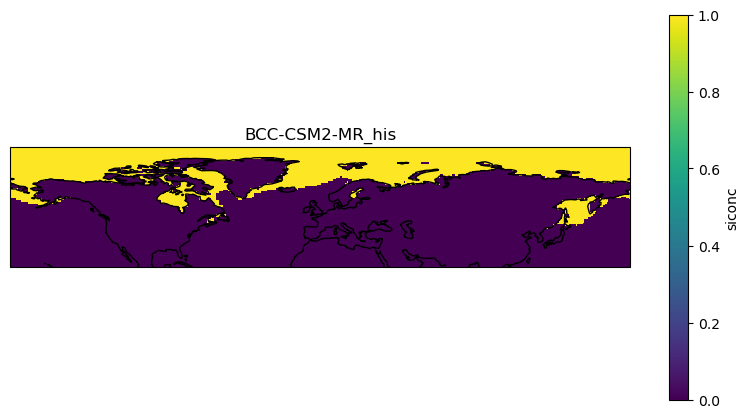

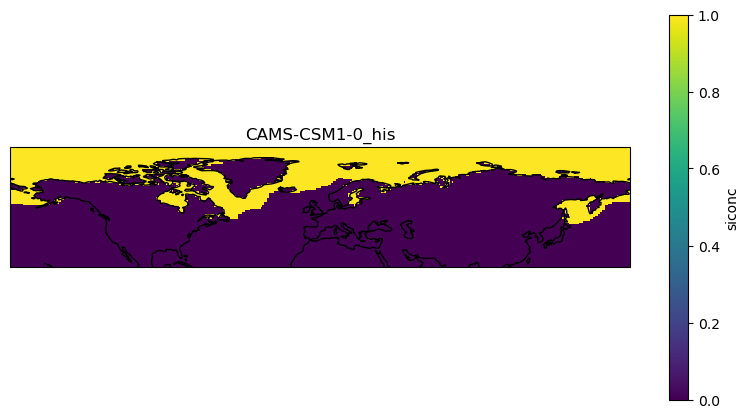

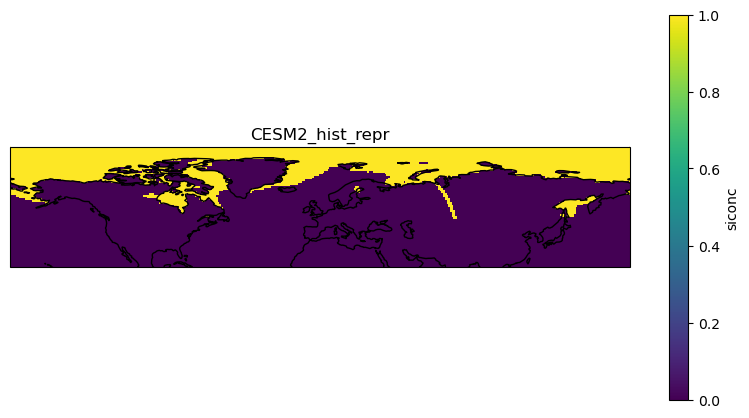

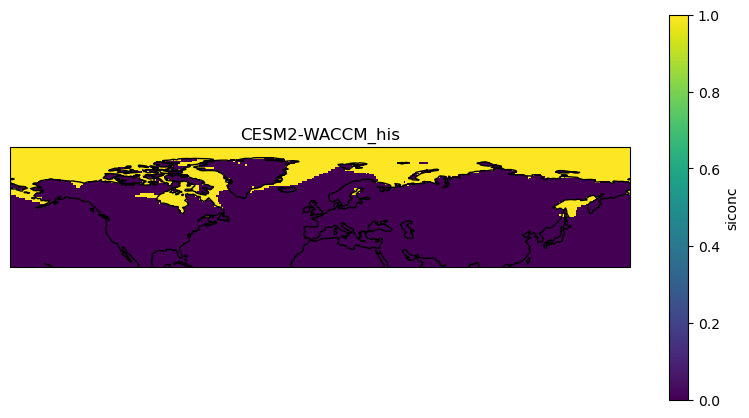

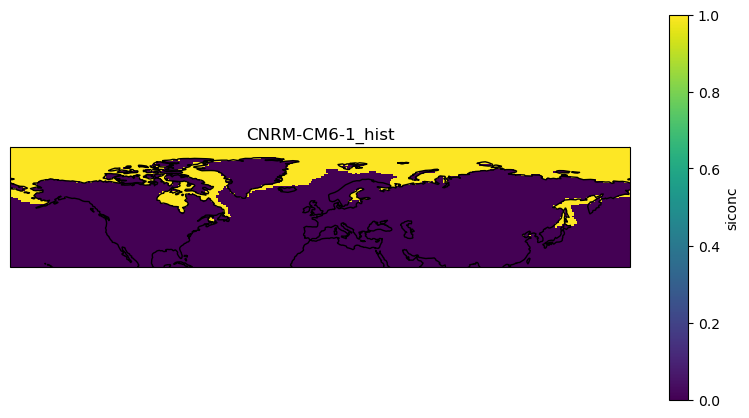

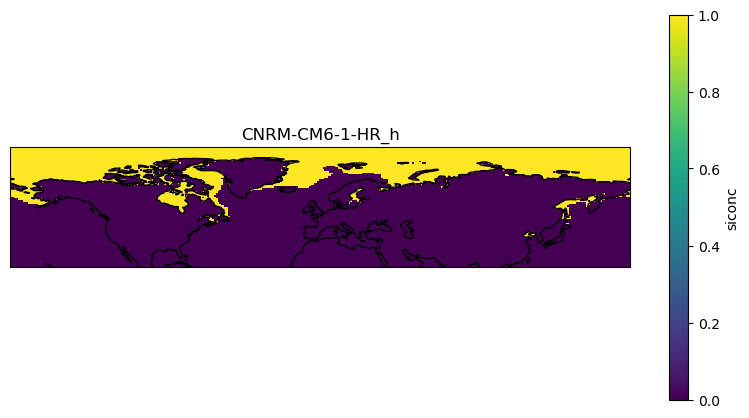

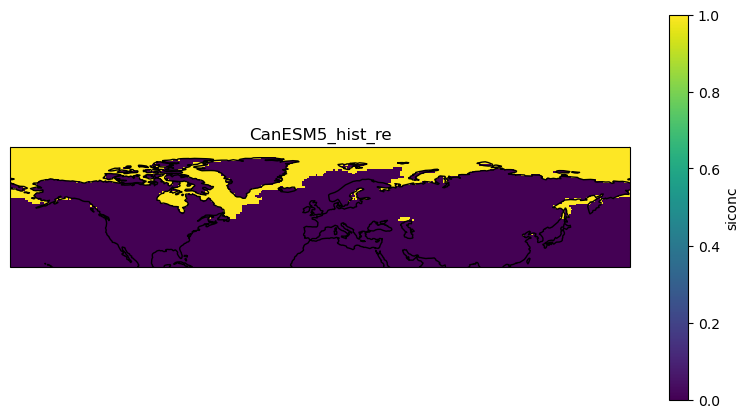

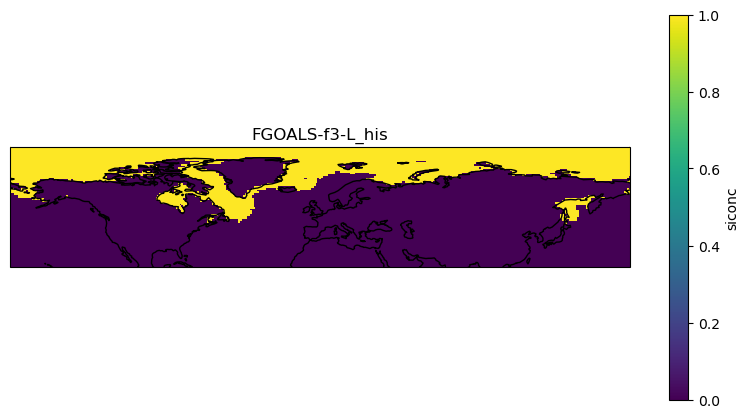

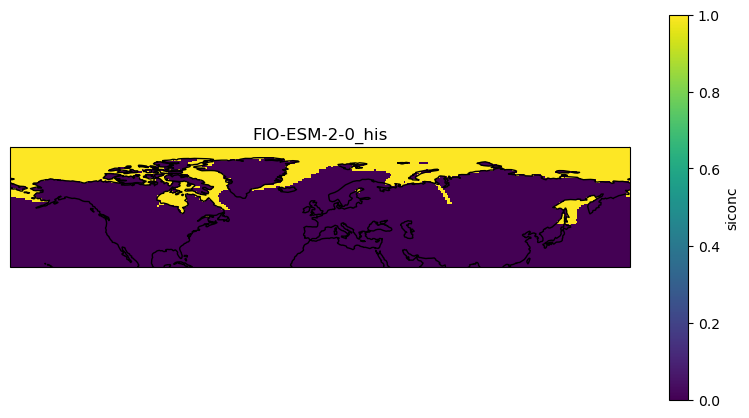

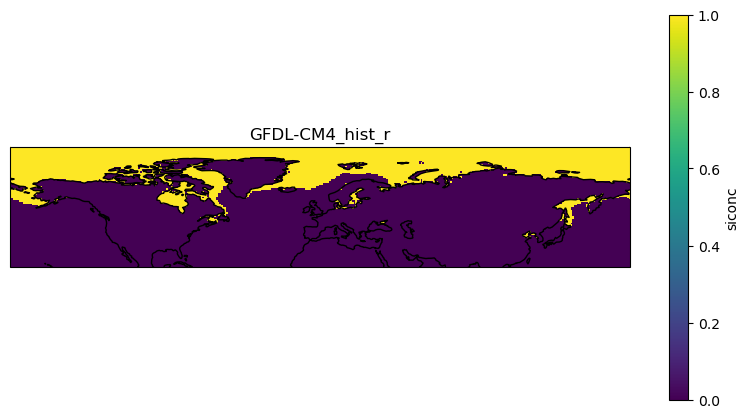

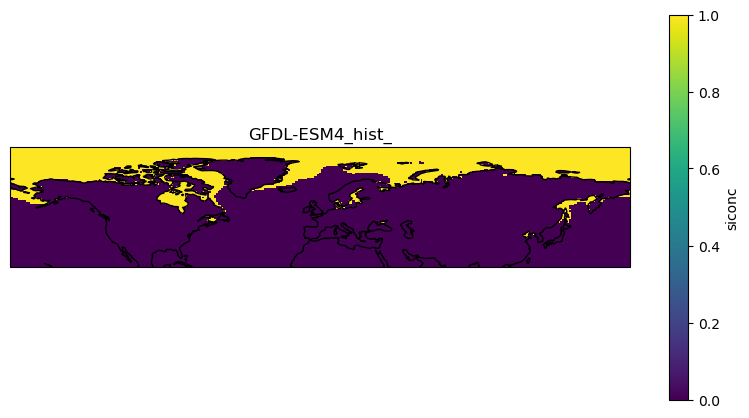

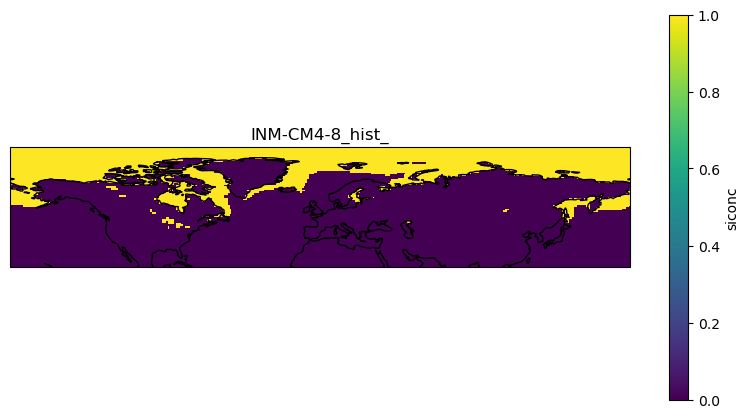

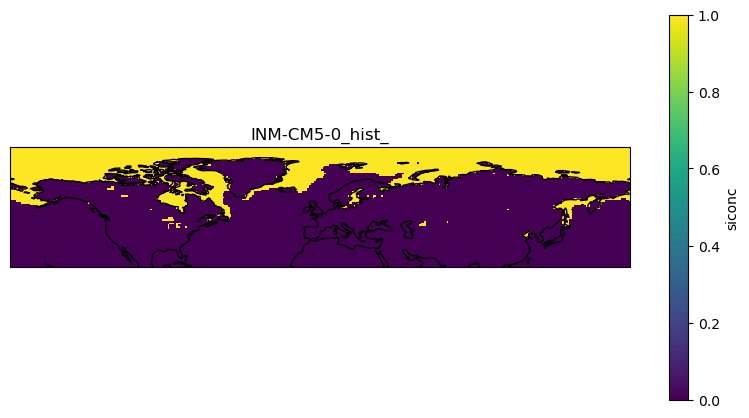

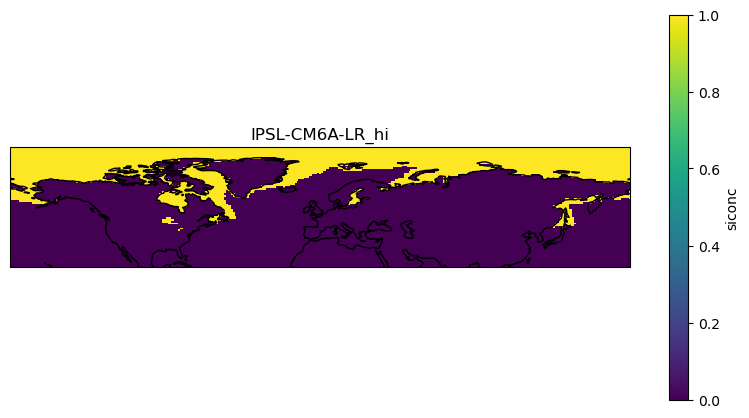

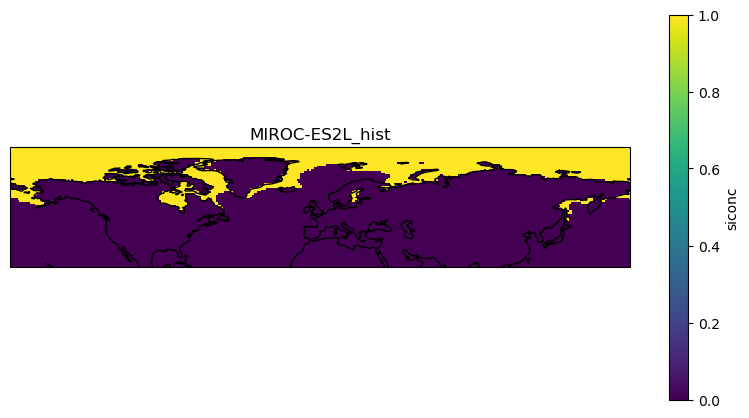

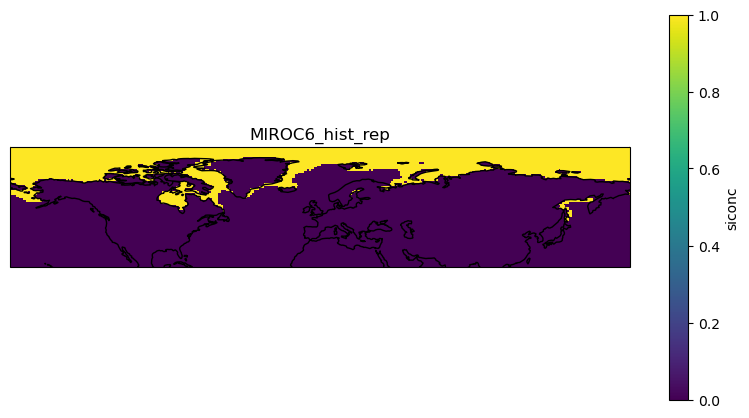

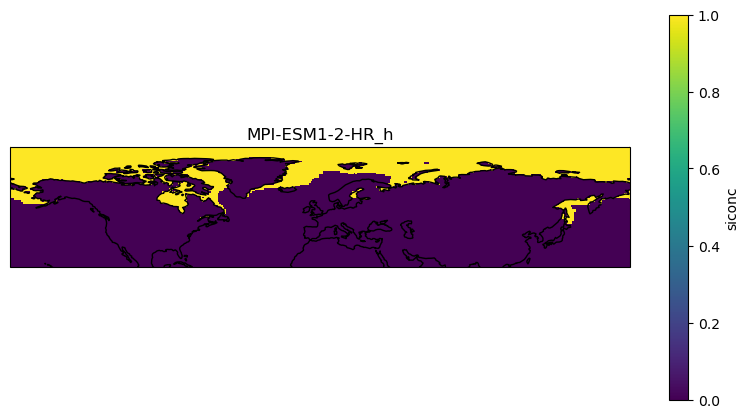

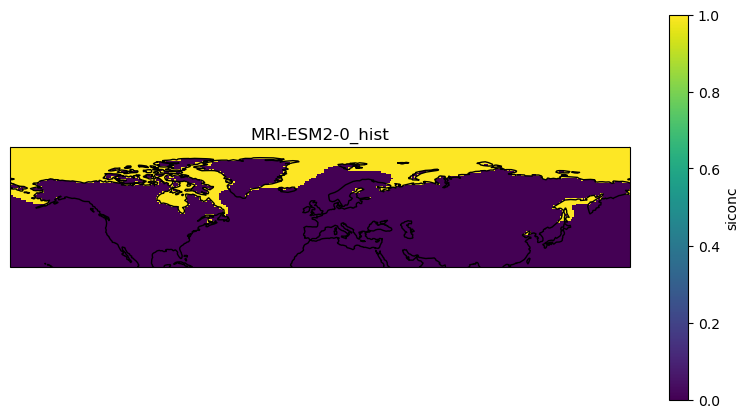

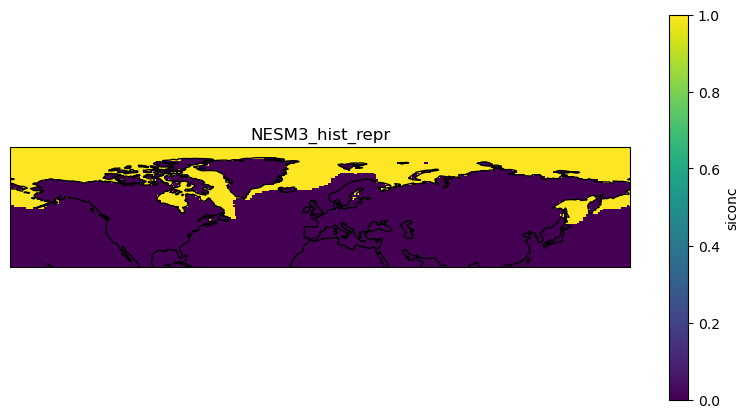

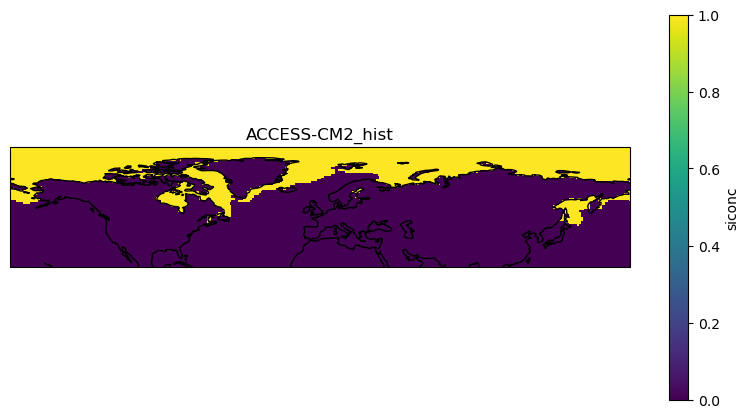

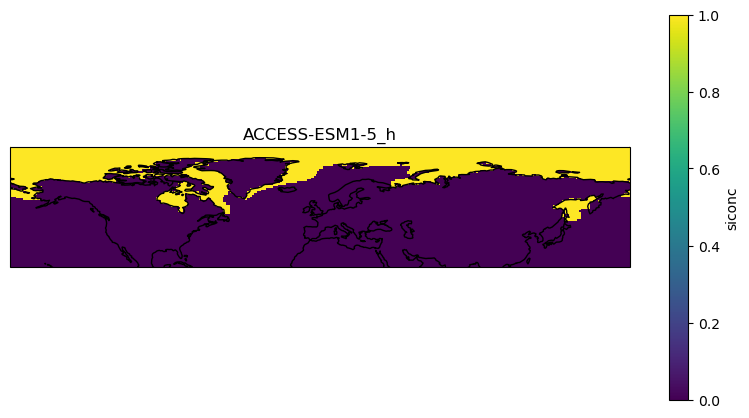

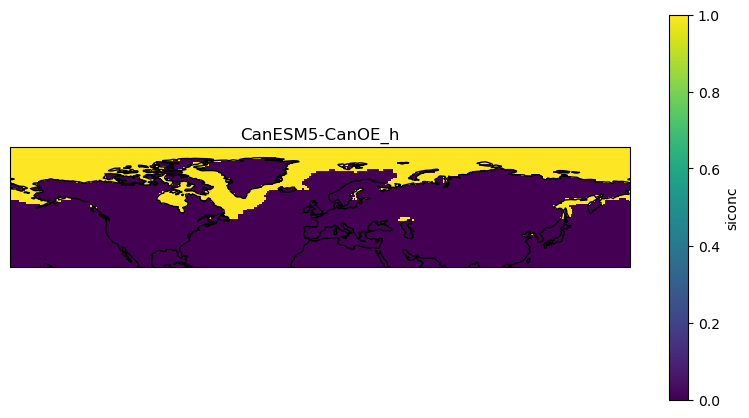

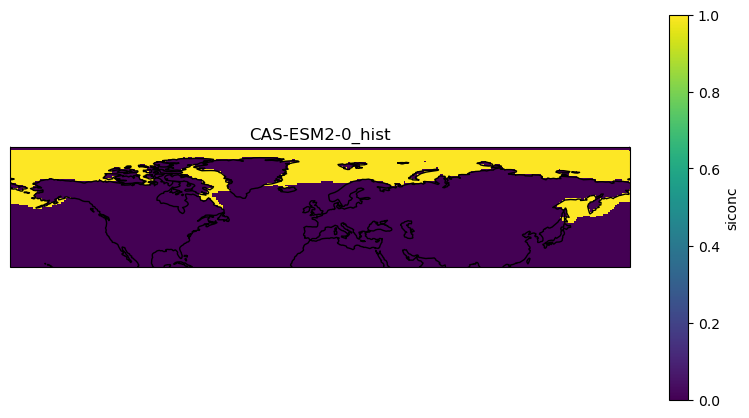

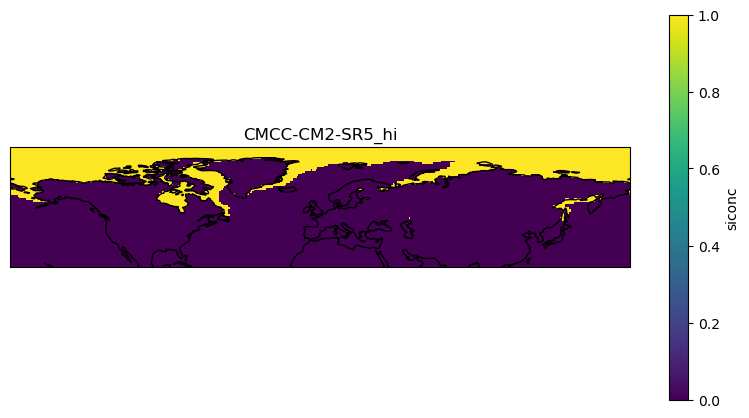

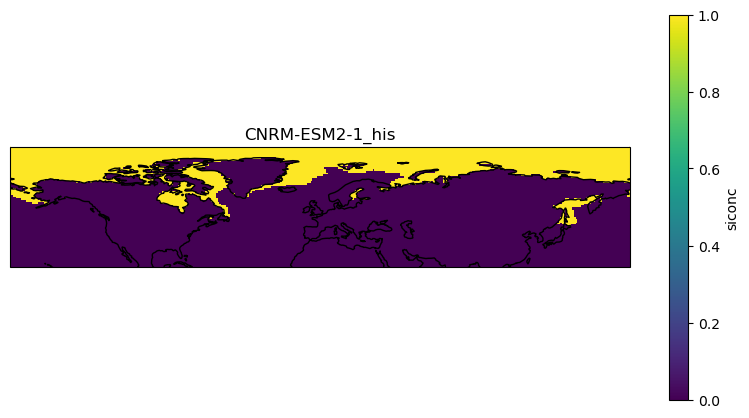

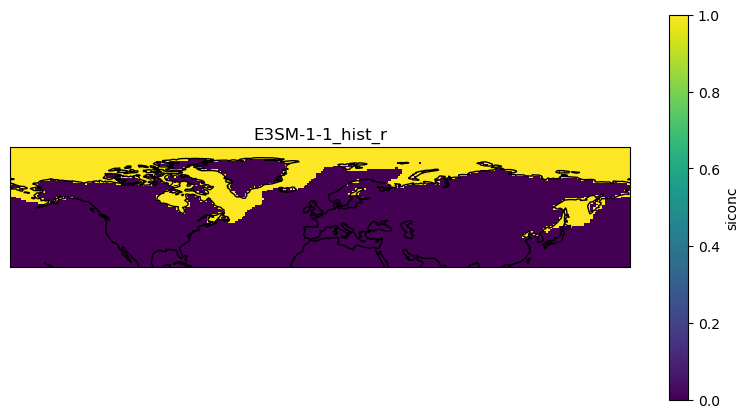

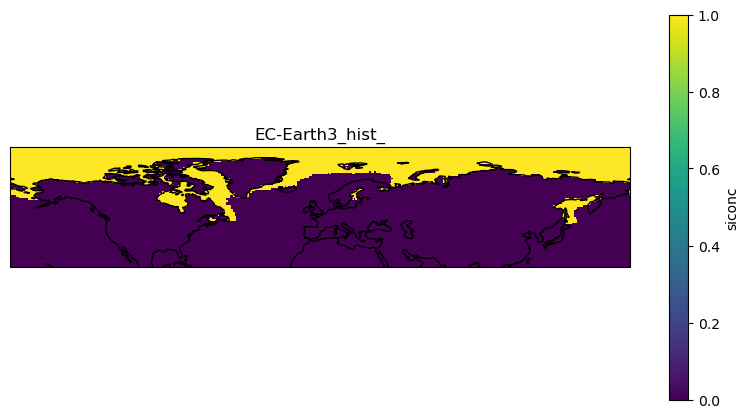

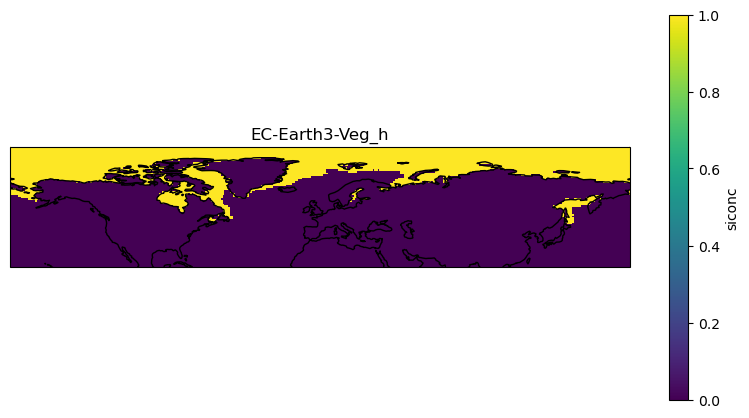

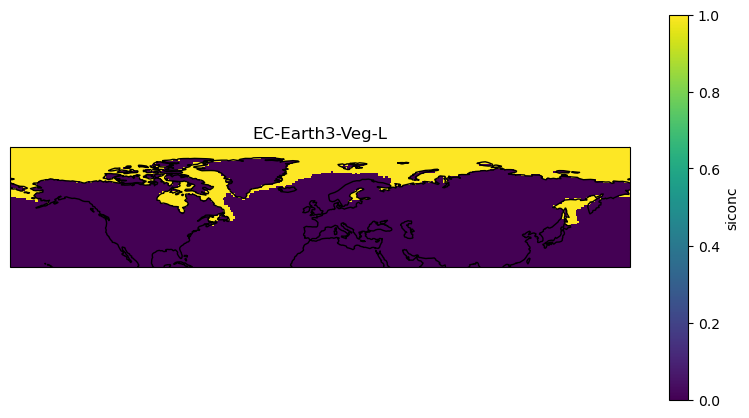

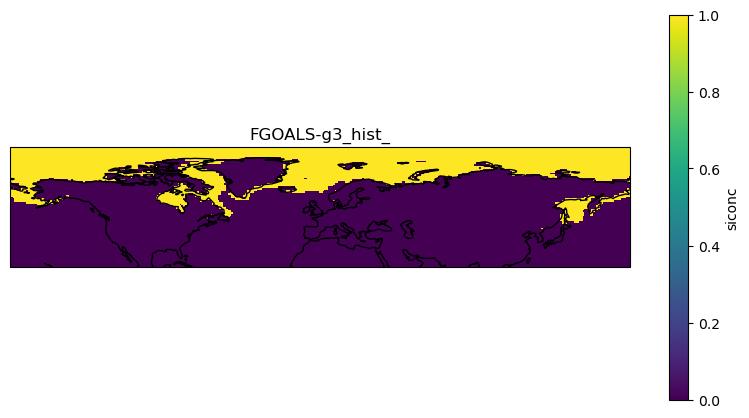

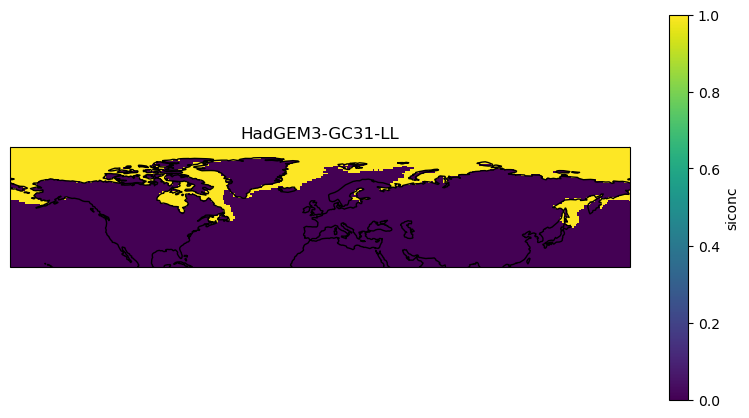

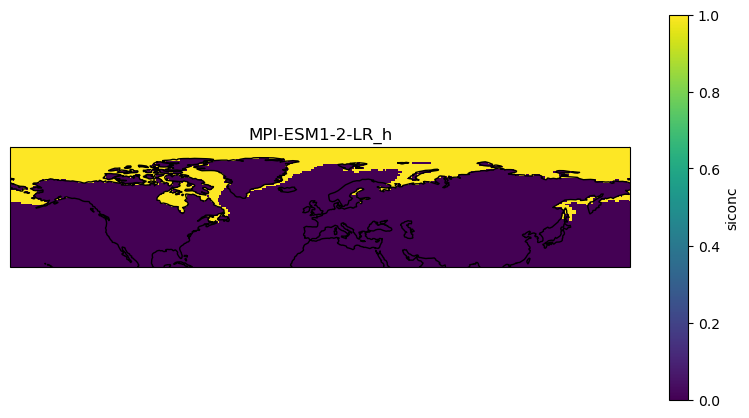

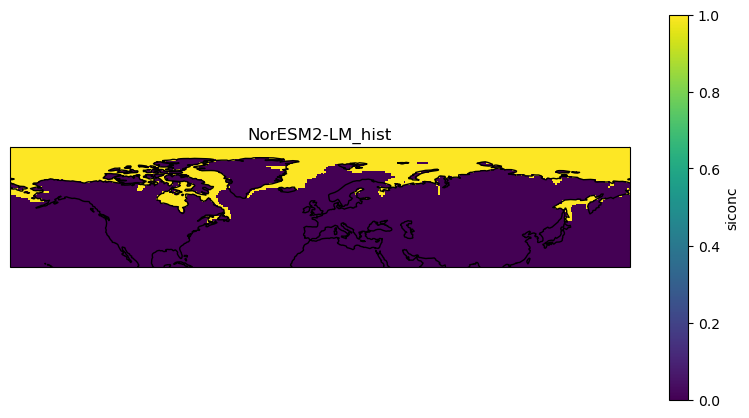

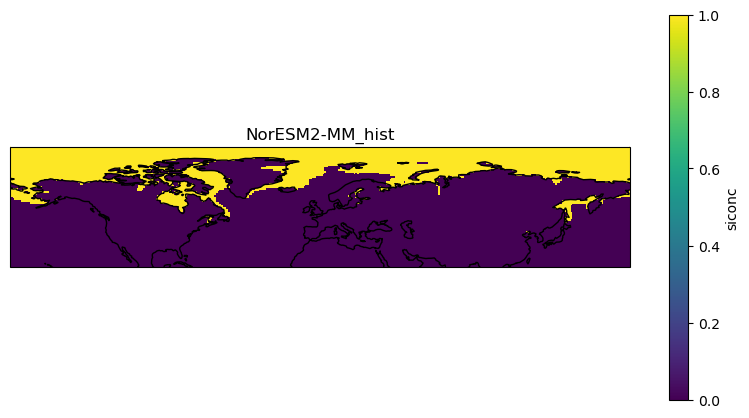

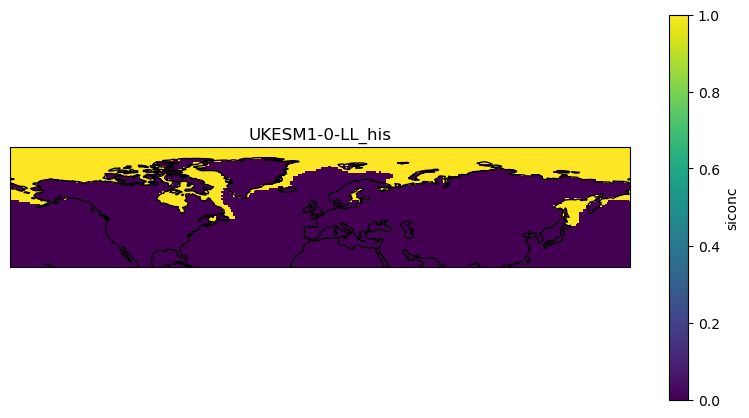

In [16]:
seaice_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_siconc = os.path.join("/home/jovyan/private-storage/output_data/sea_ice_interp_new/", files)
    path_areacella = os.path.join("/home/jovyan/private-storage/output_data/areacella_recalcule_new/", files.replace("hist_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/private-storage/output_data/interp_sftlf/", files.replace("hist", "sftlf"))
                                 
    ds_siconc, ds_area, ds_sftlf = get_data(path_siconc, path_areacella, path_sftlf)
    sftlf = ds_sftlf["sftlf"]
    siconc, seaice_cover, monthly_mean = extraction_variable_and_monthly_mean_nh(ds_siconc)
    binary_mask = binary_mask_from_siconc(seaice_cover)

    areacella = ds_area["cell_area"]
    seaice_cover_km2 = seaice_surface_calculation(seaice_cover, areacella)
    seaice_cover_dict[model_name] = binary_mask

    #ax = axes[i]
    plot_binary_mask(binary_mask, title=files[:15])

    #print(snow_cover_km2)
    
    ds_siconc.close()
    ds_area.close()


In [17]:
for model, da in seaice_cover_dict.items():
    if 'type' in da.coords:
        print(f"{model}: {da['type'].values}")

BCC-CSM2-MR: b'sea_ice'
CAMS-CSM1-0: b'sea_ice'
CNRM-CM6-1: b'typesi'
CNRM-CM6-1-HR: b'typesi'
CanESM5: b'sea_ice'
FGOALS-f3-L: b'sea_ice'
FIO-ESM-2-0: b'sea_ice'
INM-CM4-8: b'sea_ice'
INM-CM5-0: b'sea_ice'
IPSL-CM6A-LR: b'typesi'
MIROC-ES2L: b'sea_ice'
MIROC6: b'sea_ice'
MPI-ESM1-2-HR: b'sea_ice'
MRI-ESM2-0: b'sea_ice'
NESM3: b'sea_ice'
ACCESS-CM2: b'sea_ice'
ACCESS-ESM1-5: b'sea_ice'
CanESM5-CanOE: b'sea_ice'
CAS-ESM2-0: b'sea_ice'
CMCC-CM2-SR5: b'sea_ice'
CNRM-ESM2-1: b'typesi'
E3SM-1-1: b'sea_ice'
EC-Earth3: b'sea_ice'
EC-Earth3-Veg: b'sea_ice'
EC-Earth3-Veg-LR: b'sea_ice'
FGOALS-g3: b'sea_ice'
HadGEM3-GC31-LL: b'sea_ice'
MPI-ESM1-2-LR: b'sea_ice'
NorESM2-LM: b'sea_ice'
NorESM2-MM: b'sea_ice'
UKESM1-0-LL: b'sea_ice'


In [18]:
cleaned_siconc = []
model_names = []

for model, da in seaice_cover_dict.items():
    if 'type' in da.coords:
        da = da.drop_vars('type')

    cleaned_siconc.append(da)
    model_names.append(model)

In [19]:
all_siconc = xr.concat(cleaned_siconc, dim=xr.DataArray(model_names, dims="model"))

monthly_sum = all_siconc.sum(dim="model")

In [20]:
path_sftlf = os.path.join("/home/jovyan/private-storage/output_data/interp_sftlf/", "GFDL-CM4_sftlf_reprojete.nc")

sftlf = xr.open_dataset(path_sftlf)
sftlf = sftlf["sftlf"]

### Seasonal maps

In [21]:
# seasons definition
season_months = {
    "DJF": [12, 1, 2],
    "MAM": [3, 4, 5],
    "JJA": [6, 7, 8],
    "SON": [9, 10, 11]
}

In [22]:
seasonal_sum = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = monthly_sum.sel(month=months_float)
    seasonal_sum[season] = da_sel.mean(dim="month", skipna=True)

In [23]:
seasonal_sum_DJF = seasonal_sum['DJF']
seasonal_sum_MAM = seasonal_sum['MAM']
seasonal_sum_JJA = seasonal_sum['JJA']
seasonal_sum_SON = seasonal_sum['SON']

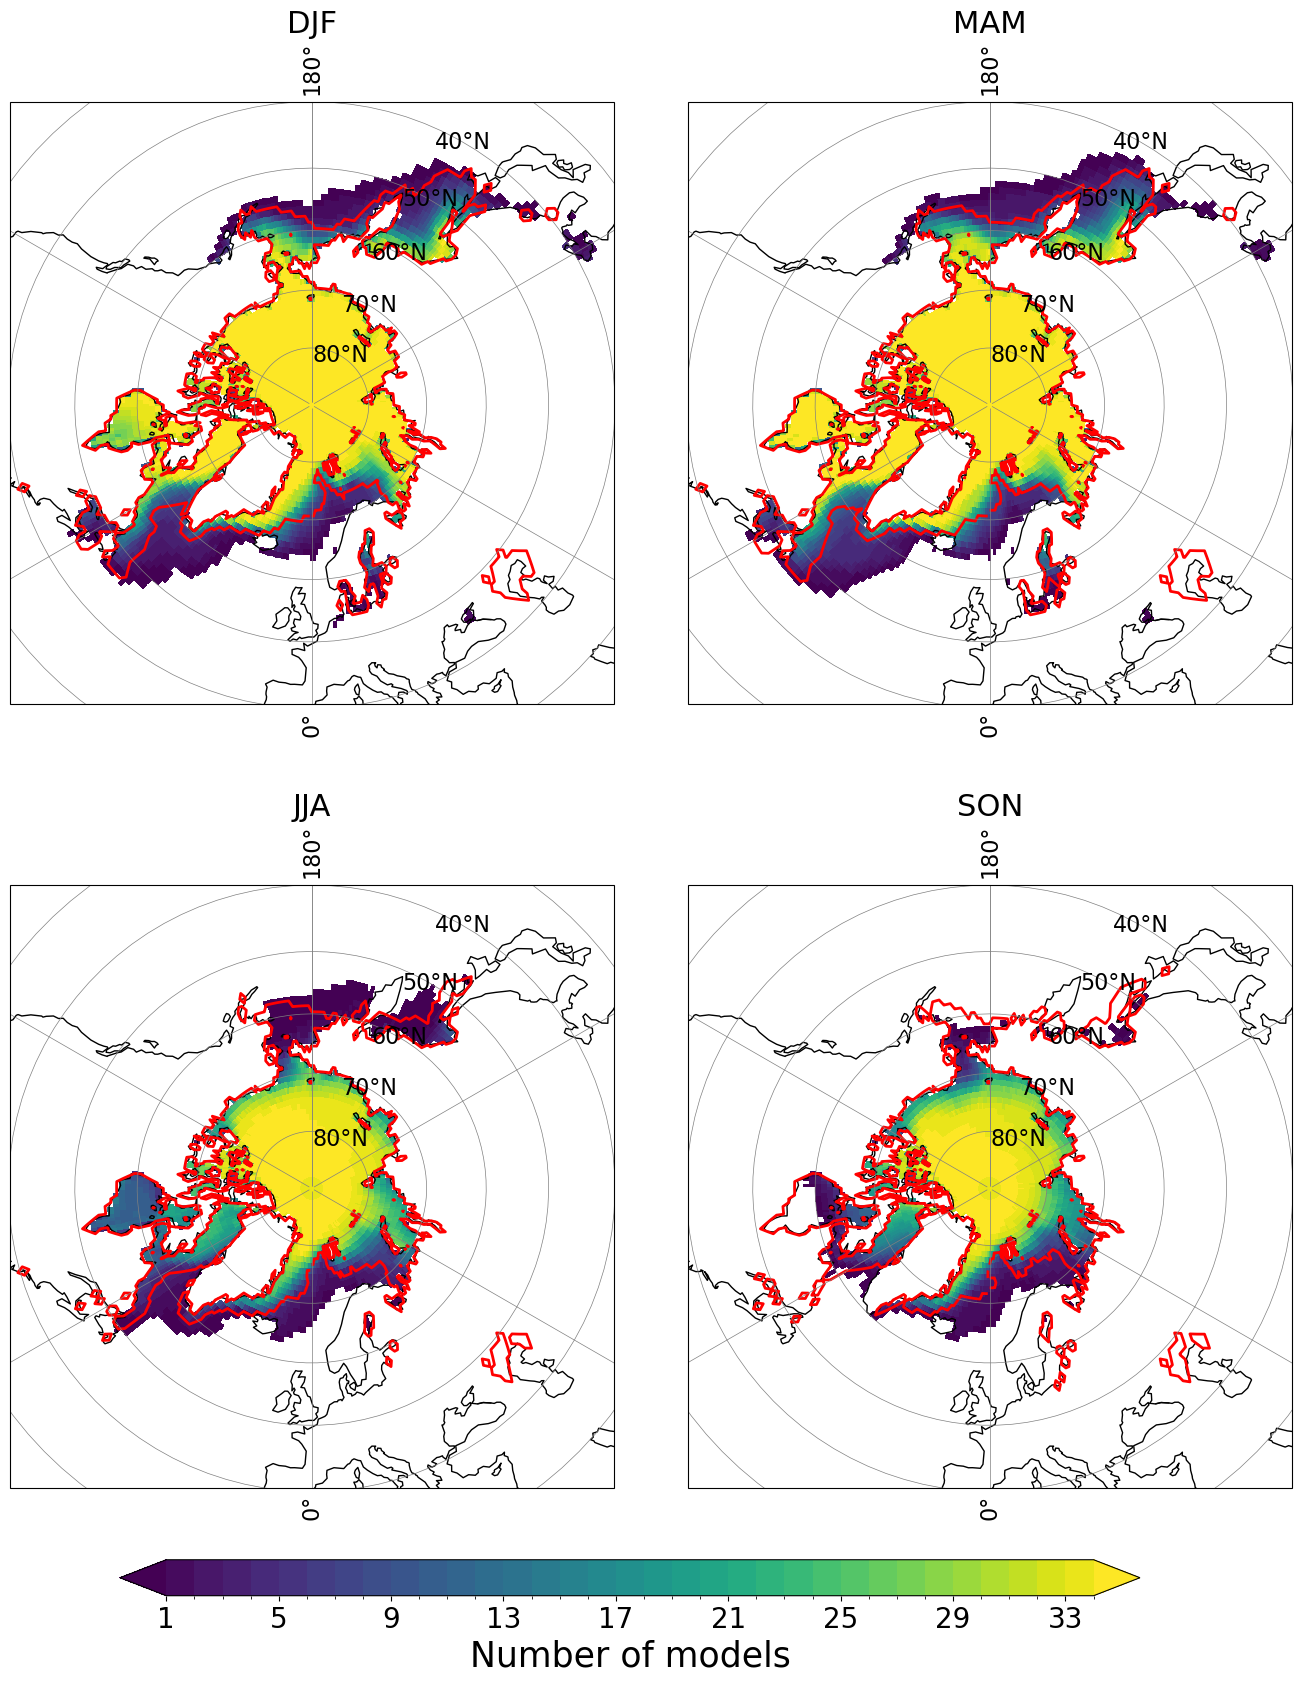

In [25]:
# Dictionnaires des valeurs par saison et référence
seasonal_data = {
    'DJF': seasonal_sum_DJF,
    'MAM': seasonal_sum_MAM,
    'JJA': seasonal_sum_JJA,
    'SON': seasonal_sum_SON
}

reference_data = {
    'DJF': djf_seaice_reference_binary_nh,
    'MAM': mam_seaice_reference_binary_nh,
    'JJA': jja_seaice_reference_binary_nh,
    'SON': son_seaice_reference_binary_nh
}

landmask = sftlf < 50

# figure
fig, axes = plt.subplots(2, 2, figsize=(17, 18), subplot_kw={'projection': ccrs.NorthPolarStereo()})
axes = axes.flatten()

# couleurs
cmap = mpl.cm.viridis
bounds = list(range(1, 35))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

# tracé des 4 saisons
for ax, (season, data) in zip(axes, seasonal_data.items()):
    ref = reference_data[season]
    data_plot = data.where((data > 0) & (landmask))
    
    mesh = ax.pcolormesh(
        data_plot['lon'],
        data_plot['lat'],
        data_plot,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        norm=norm
    )

    # contour de la référence
    contour = ax.contour(
        ref['lon'],
        ref['lat'],
        ref,
        levels=[0.15],  # seuil pour tracer le contour
        colors='red',
        linewidths=2,
        transform=ccrs.PlateCarree()
    )

    ax.set_title(f"{season}", fontsize=22)
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, color='gray', linewidth=0.5, linestyle='-')
    gl.xlabel_style = {'size': 16}
    gl.ylabel_style = {'size': 16}
    ax.set_extent([-180, 180, 40, 90], ccrs.PlateCarree())

# Barre de couleur
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cbar_ax,
    orientation='horizontal'
)
cbar.set_label("Number of models", fontsize=25)
cbar.ax.tick_params(labelsize=20)

# Ajustement mise en page
plt.subplots_adjust(wspace=0.06, hspace=0.3)

#plt.savefig("snow_cover_agreement.png")

plt.show()

## Southern Hemisphere

In [26]:
djf_seaice_reference_binary_sh = djf_seaice_reference_binary.sel(lat=djf_seaice_reference_binary.lat <= 40)
mam_seaice_reference_binary_sh = mam_seaice_reference_binary.sel(lat=mam_seaice_reference_binary.lat <= 40)
jja_seaice_reference_binary_sh = jja_seaice_reference_binary.sel(lat=jja_seaice_reference_binary.lat <= 40)
son_seaice_reference_binary_sh = son_seaice_reference_binary.sel(lat=son_seaice_reference_binary.lat <= 40)

### Binary maps for each model

La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variabl

/home/jovyan/M2_SeaIce_project/module/functions.py:330: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.
La variable 'siconc' est en %. Conversion en fraction.


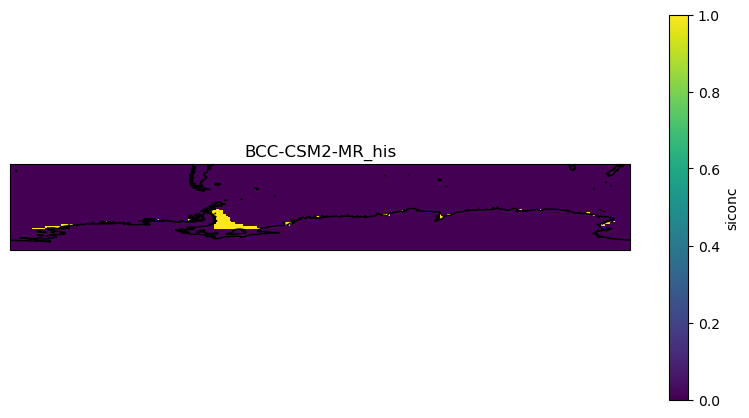

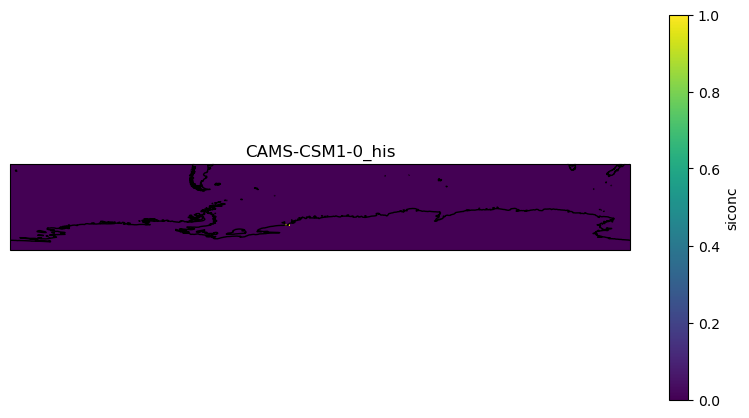

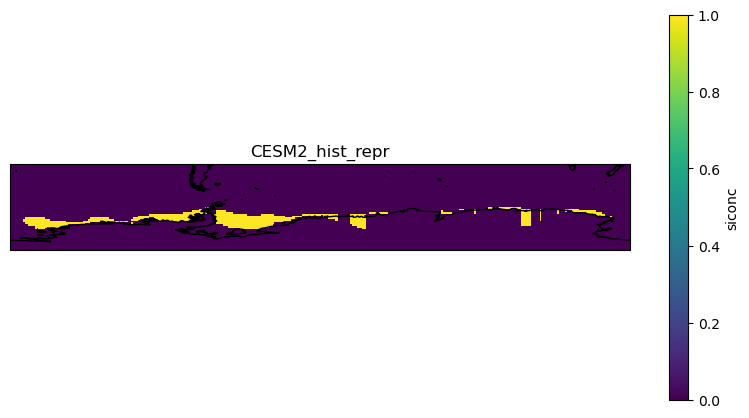

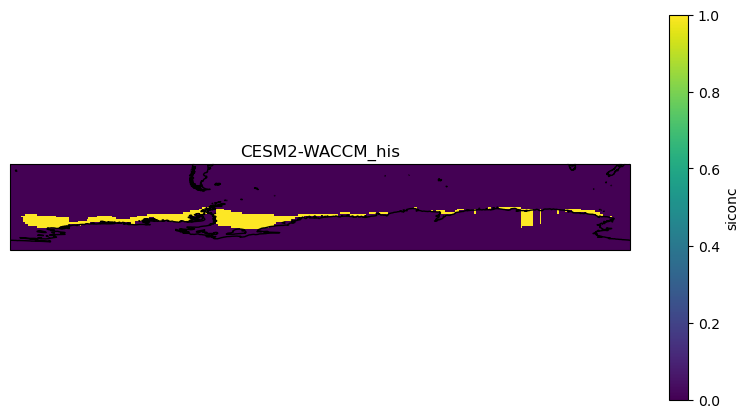

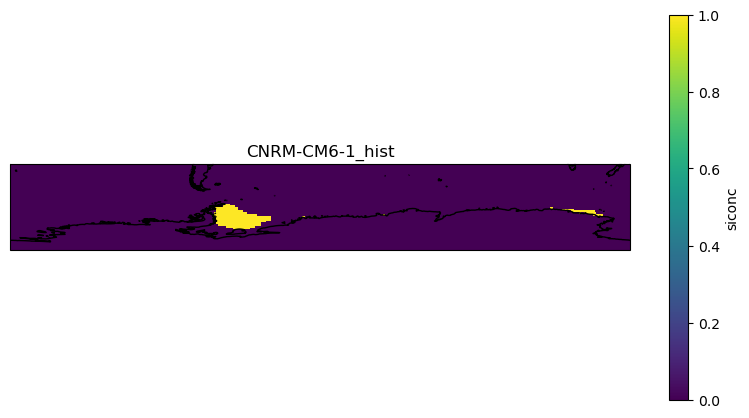

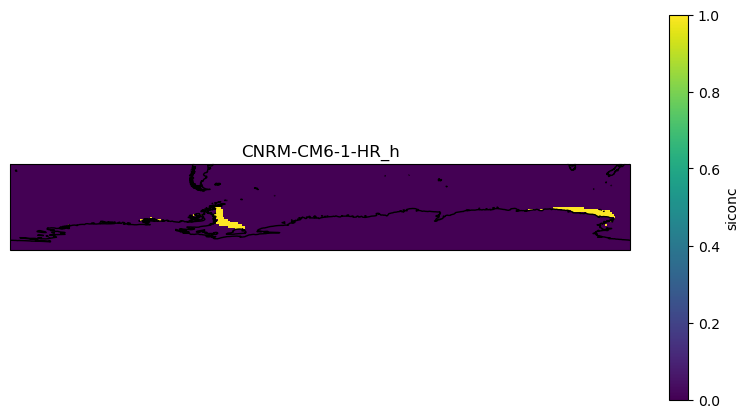

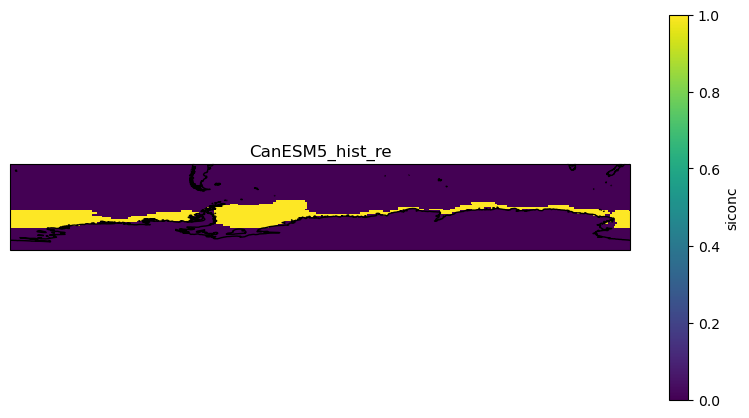

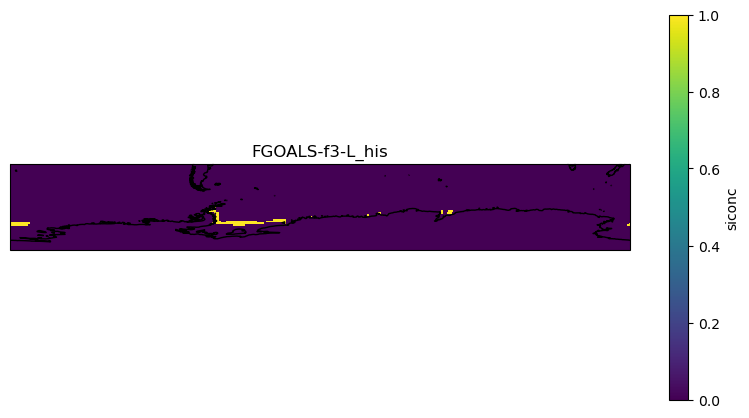

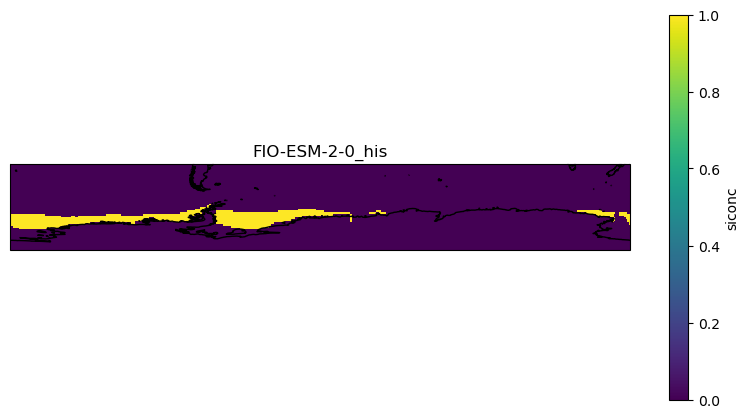

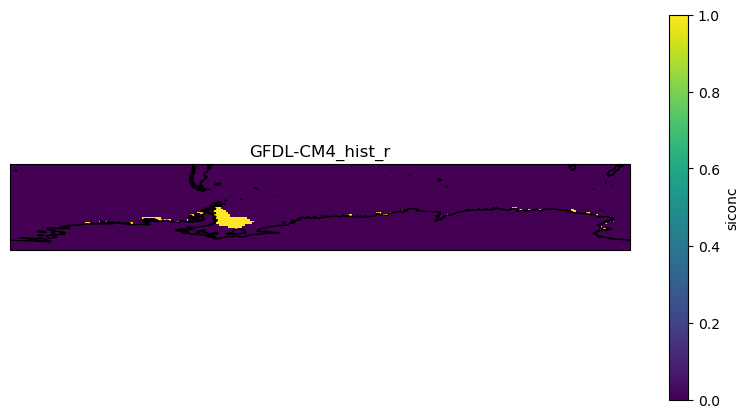

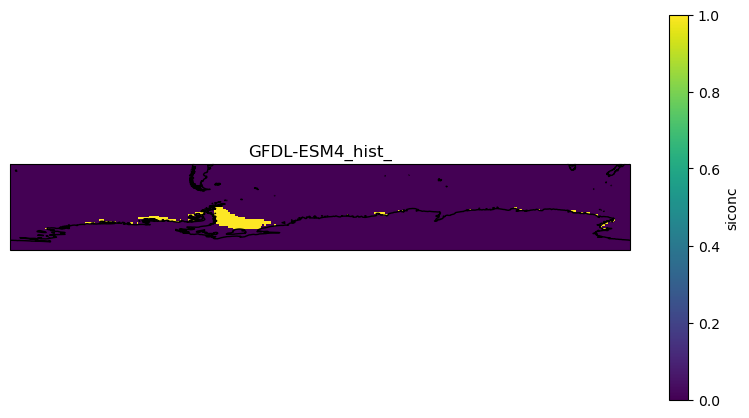

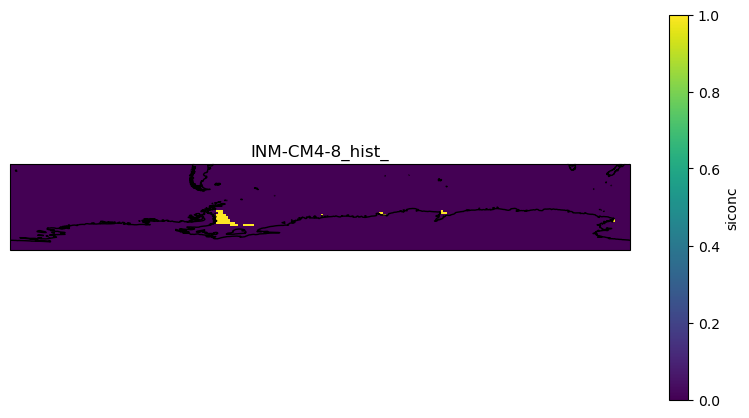

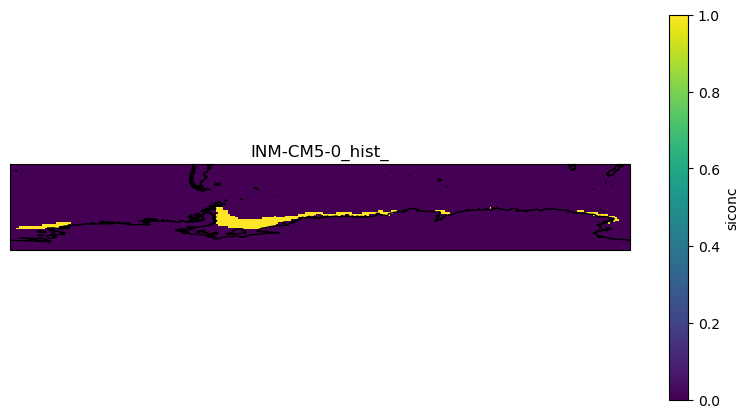

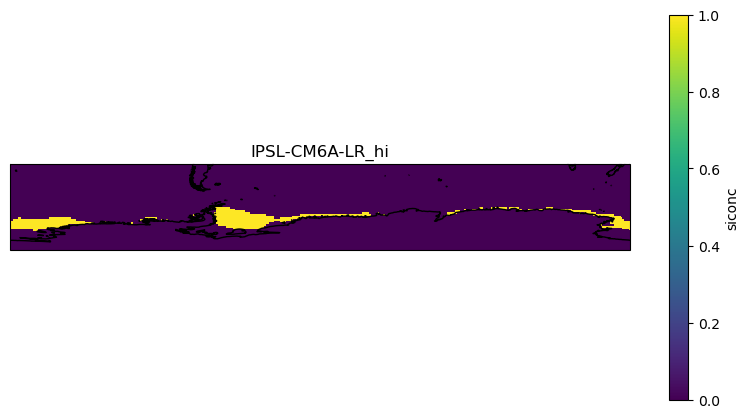

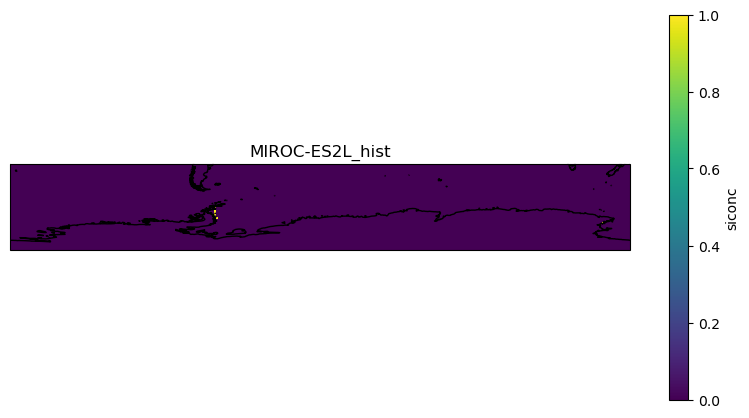

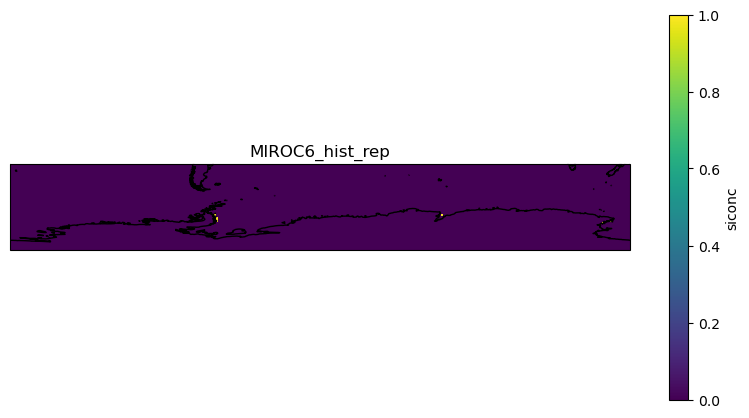

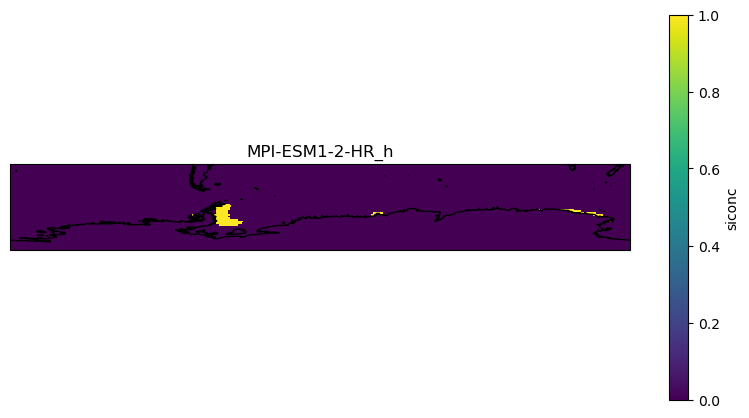

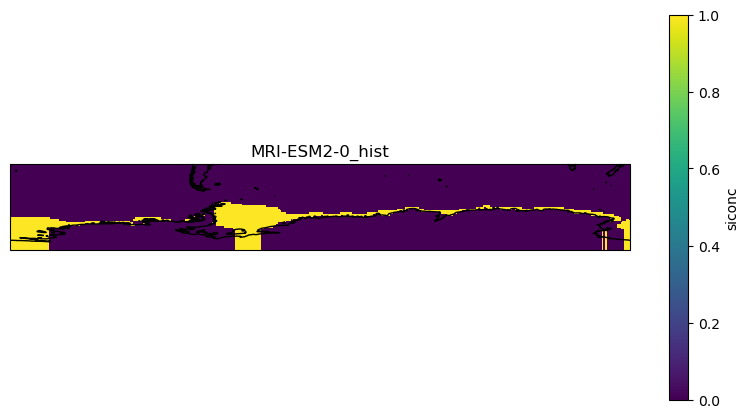

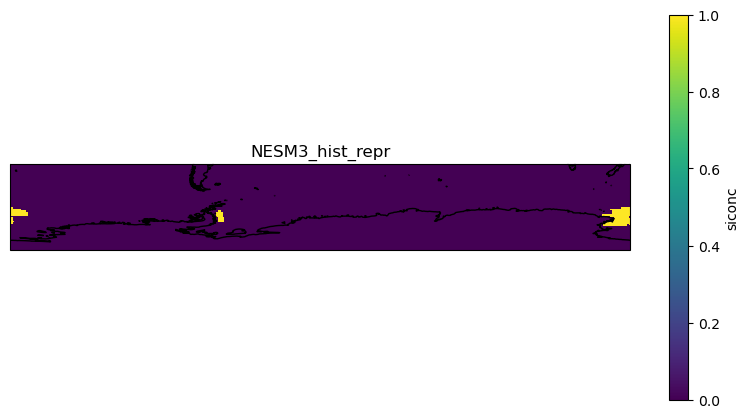

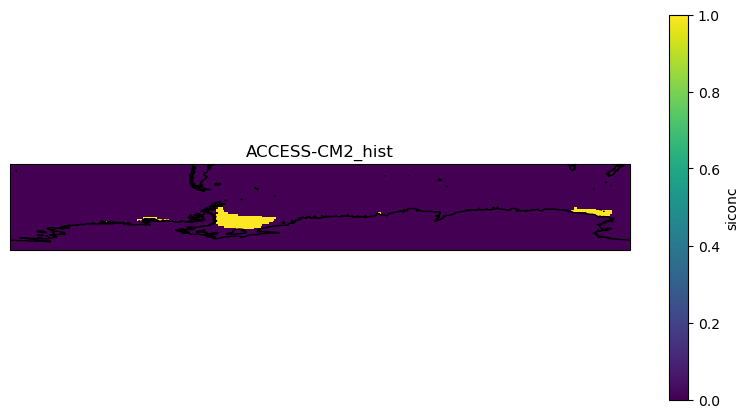

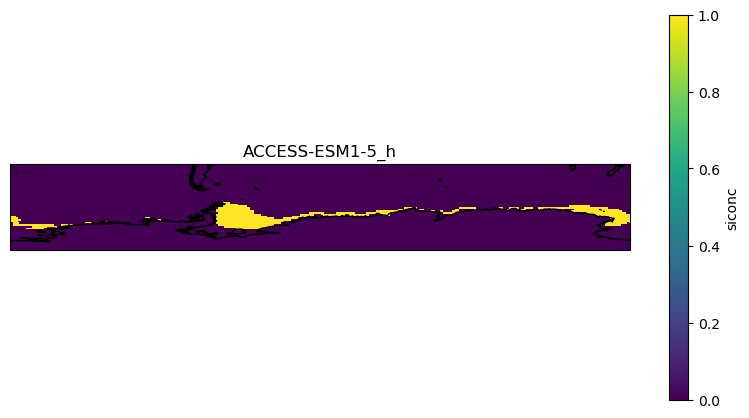

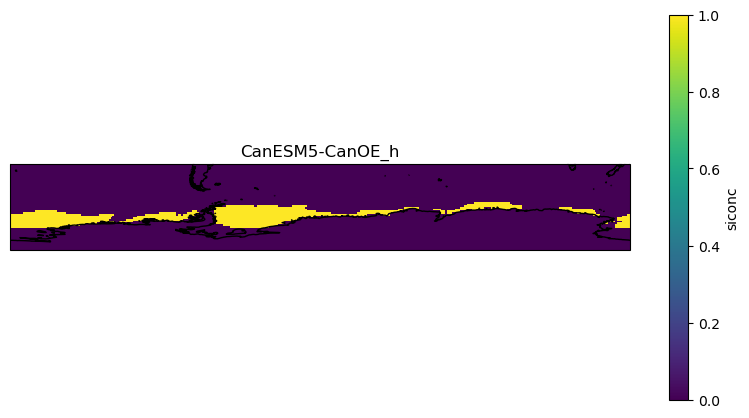

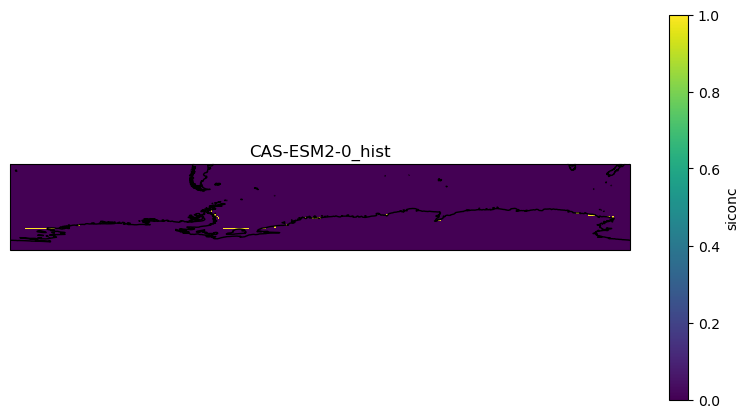

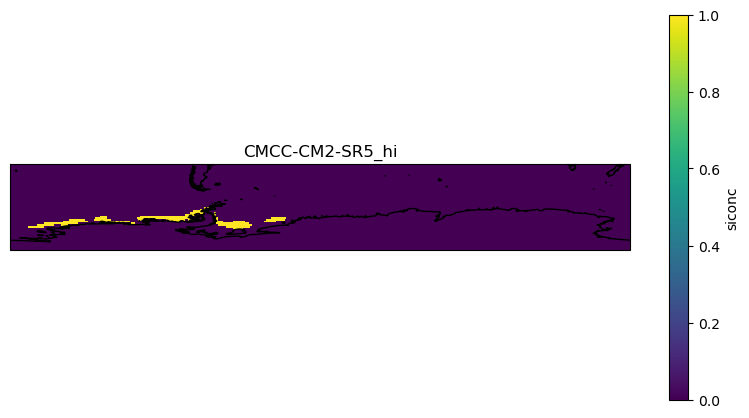

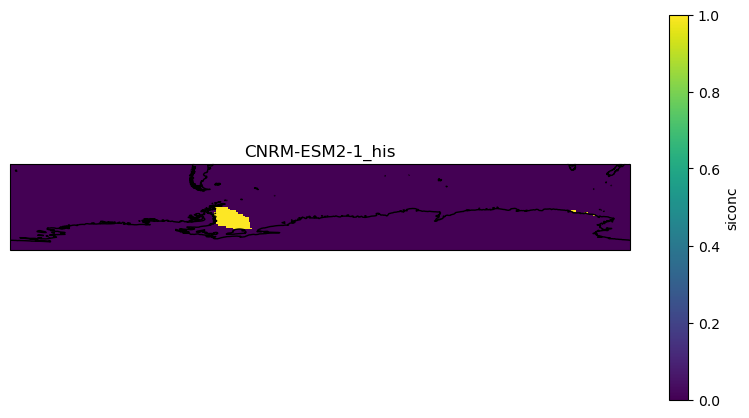

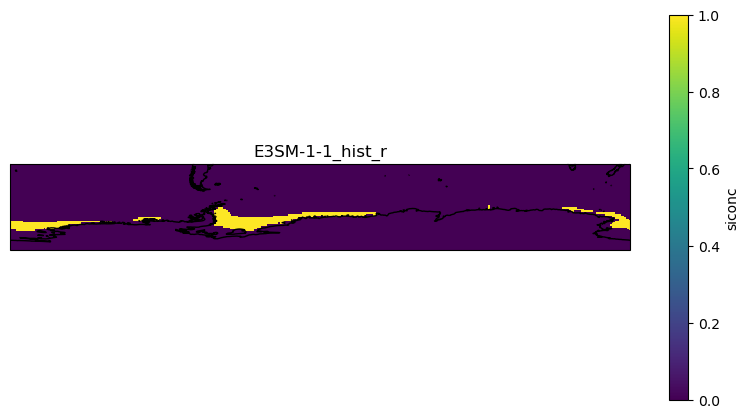

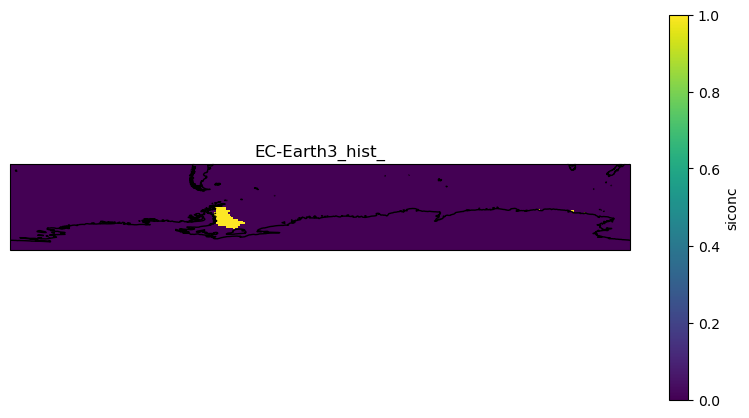

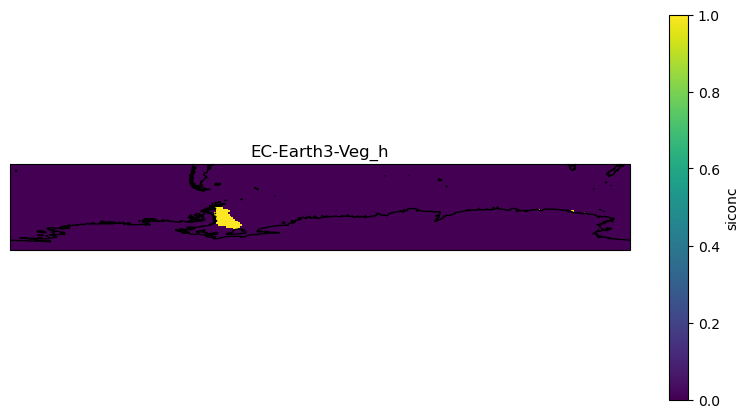

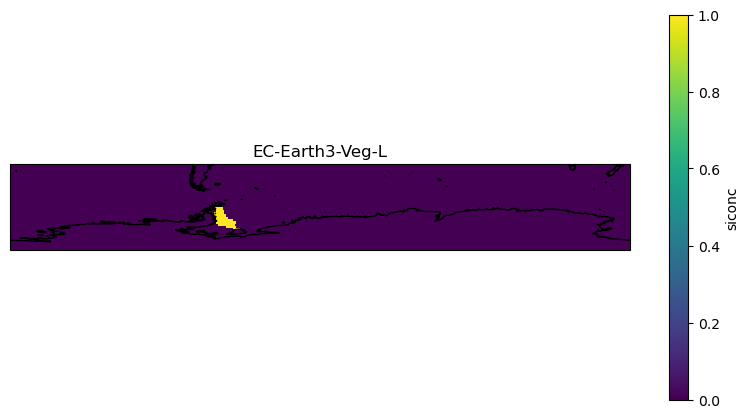

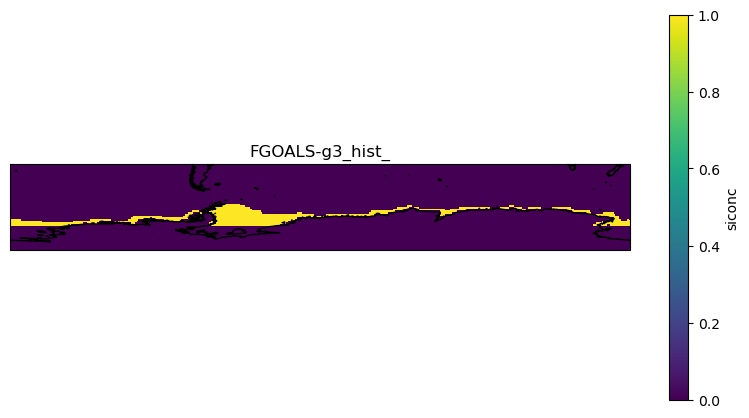

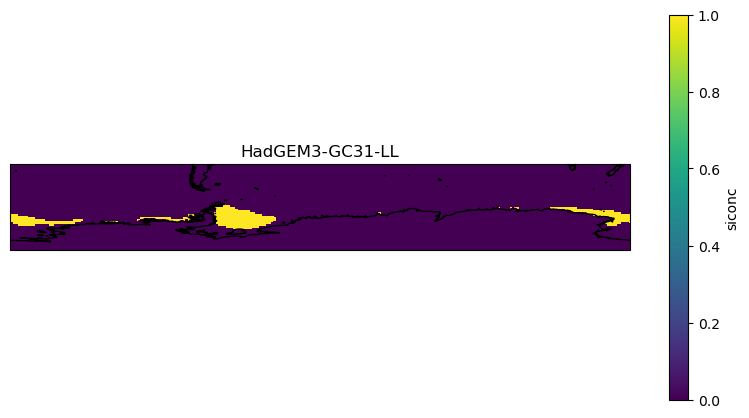

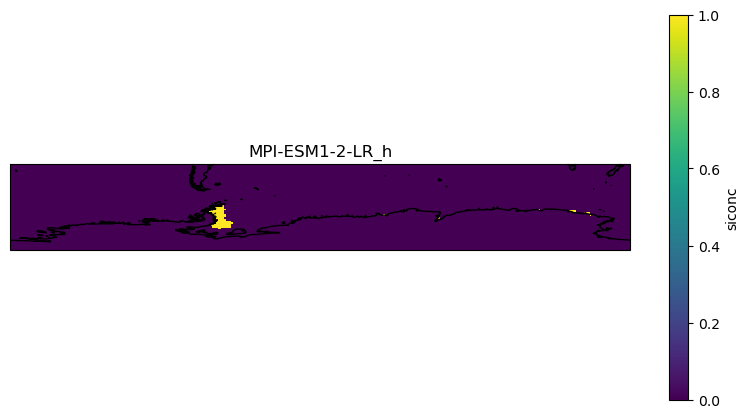

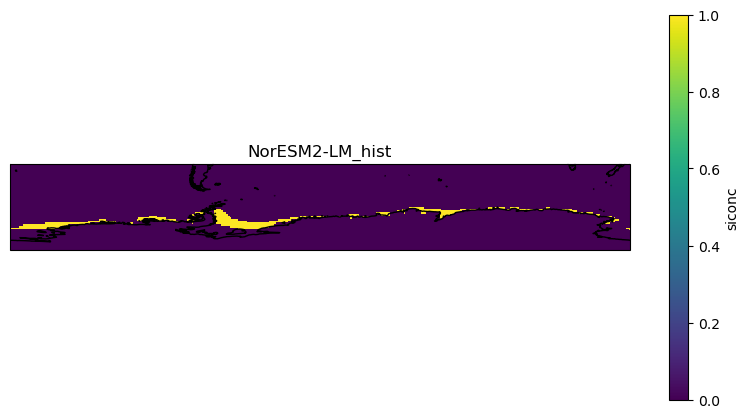

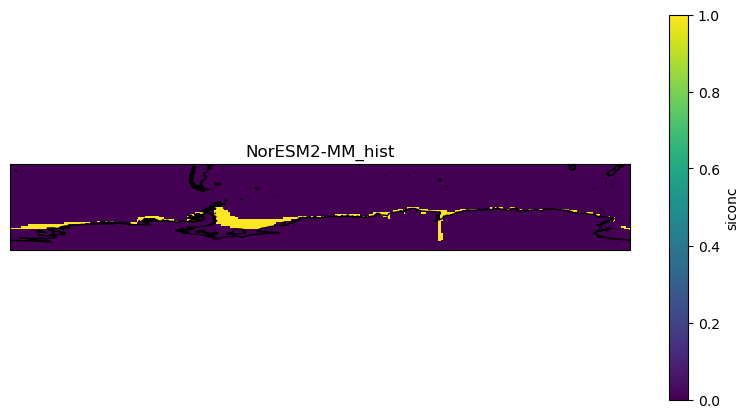

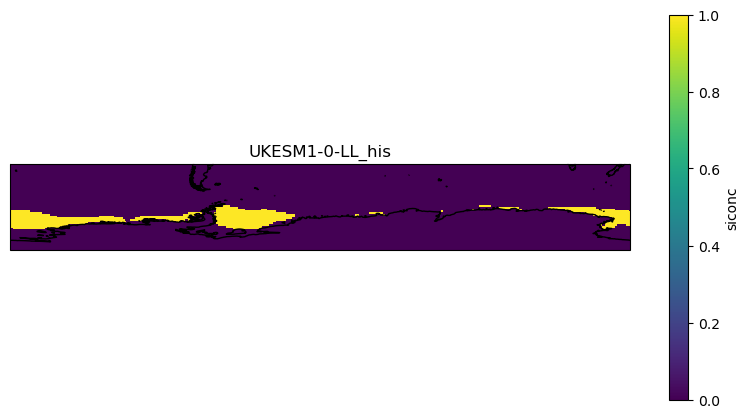

In [28]:
seaice_cover_dict = {}

for i, files in enumerate(nc_files):
    model_name = files.split("_")[0]
    
    path_siconc = os.path.join("/home/jovyan/private-storage/output_data/sea_ice_interp_new/", files)
    path_areacella = os.path.join("/home/jovyan/private-storage/output_data/areacella_recalcule_new/", files.replace("hist_reprojete", "gridarea_hist_recalcule"))
    path_sftlf = os.path.join("/home/jovyan/private-storage/output_data/interp_sftlf/", files.replace("hist", "sftlf"))
                                 
    ds_siconc, ds_area, ds_sftlf = get_data(path_siconc, path_areacella, path_sftlf)
    sftlf = ds_sftlf["sftlf"]
    siconc, seaice_cover, monthly_mean = extraction_variable_and_monthly_mean_sh(ds_siconc)
    binary_mask = binary_mask_from_siconc(seaice_cover)

    areacella = ds_area["cell_area"]
    seaice_cover_km2 = seaice_surface_calculation(seaice_cover, areacella)
    seaice_cover_dict[model_name] = binary_mask

    #ax = axes[i]
    plot_binary_mask(binary_mask, title=files[:15])

    #print(snow_cover_km2)
    
    ds_siconc.close()
    ds_area.close()

In [29]:
for model, da in seaice_cover_dict.items():
    if 'type' in da.coords:
        print(f"{model}: {da['type'].values}")

BCC-CSM2-MR: b'sea_ice'
CAMS-CSM1-0: b'sea_ice'
CNRM-CM6-1: b'typesi'
CNRM-CM6-1-HR: b'typesi'
CanESM5: b'sea_ice'
FGOALS-f3-L: b'sea_ice'
FIO-ESM-2-0: b'sea_ice'
INM-CM4-8: b'sea_ice'
INM-CM5-0: b'sea_ice'
IPSL-CM6A-LR: b'typesi'
MIROC-ES2L: b'sea_ice'
MIROC6: b'sea_ice'
MPI-ESM1-2-HR: b'sea_ice'
MRI-ESM2-0: b'sea_ice'
NESM3: b'sea_ice'
ACCESS-CM2: b'sea_ice'
ACCESS-ESM1-5: b'sea_ice'
CanESM5-CanOE: b'sea_ice'
CAS-ESM2-0: b'sea_ice'
CMCC-CM2-SR5: b'sea_ice'
CNRM-ESM2-1: b'typesi'
E3SM-1-1: b'sea_ice'
EC-Earth3: b'sea_ice'
EC-Earth3-Veg: b'sea_ice'
EC-Earth3-Veg-LR: b'sea_ice'
FGOALS-g3: b'sea_ice'
HadGEM3-GC31-LL: b'sea_ice'
MPI-ESM1-2-LR: b'sea_ice'
NorESM2-LM: b'sea_ice'
NorESM2-MM: b'sea_ice'
UKESM1-0-LL: b'sea_ice'


In [30]:
cleaned_siconc = []
model_names = []

for model, da in seaice_cover_dict.items():
    if 'type' in da.coords:
        da = da.drop_vars('type')

    cleaned_siconc.append(da)
    model_names.append(model)

In [31]:
all_siconc = xr.concat(cleaned_siconc, dim=xr.DataArray(model_names, dims="model"))

monthly_sum = all_siconc.sum(dim="model")

In [32]:
path_sftlf = os.path.join("/home/jovyan/private-storage/output_data/interp_sftlf/", "GFDL-CM4_sftlf_reprojete.nc")

sftlf = xr.open_dataset(path_sftlf)
sftlf = sftlf["sftlf"]

### Seasonal maps

In [33]:
# season definition
season_months = {
    "DJF": [12, 1, 2], #summer
    "MAM": [3, 4, 5], #autumn
    "JJA": [6, 7, 8], #winter
    "SON": [9, 10, 11] #spring
}

In [34]:
seasonal_sum = {}

for season, months in season_months.items():
    months_float = [float(m) for m in months]
    da_sel = monthly_sum.sel(month=months_float)
    seasonal_sum[season] = da_sel.mean(dim="month", skipna=True)

In [35]:
seasonal_sum_DJF = seasonal_sum['DJF']
seasonal_sum_MAM = seasonal_sum['MAM']
seasonal_sum_JJA = seasonal_sum['JJA']
seasonal_sum_SON = seasonal_sum['SON']

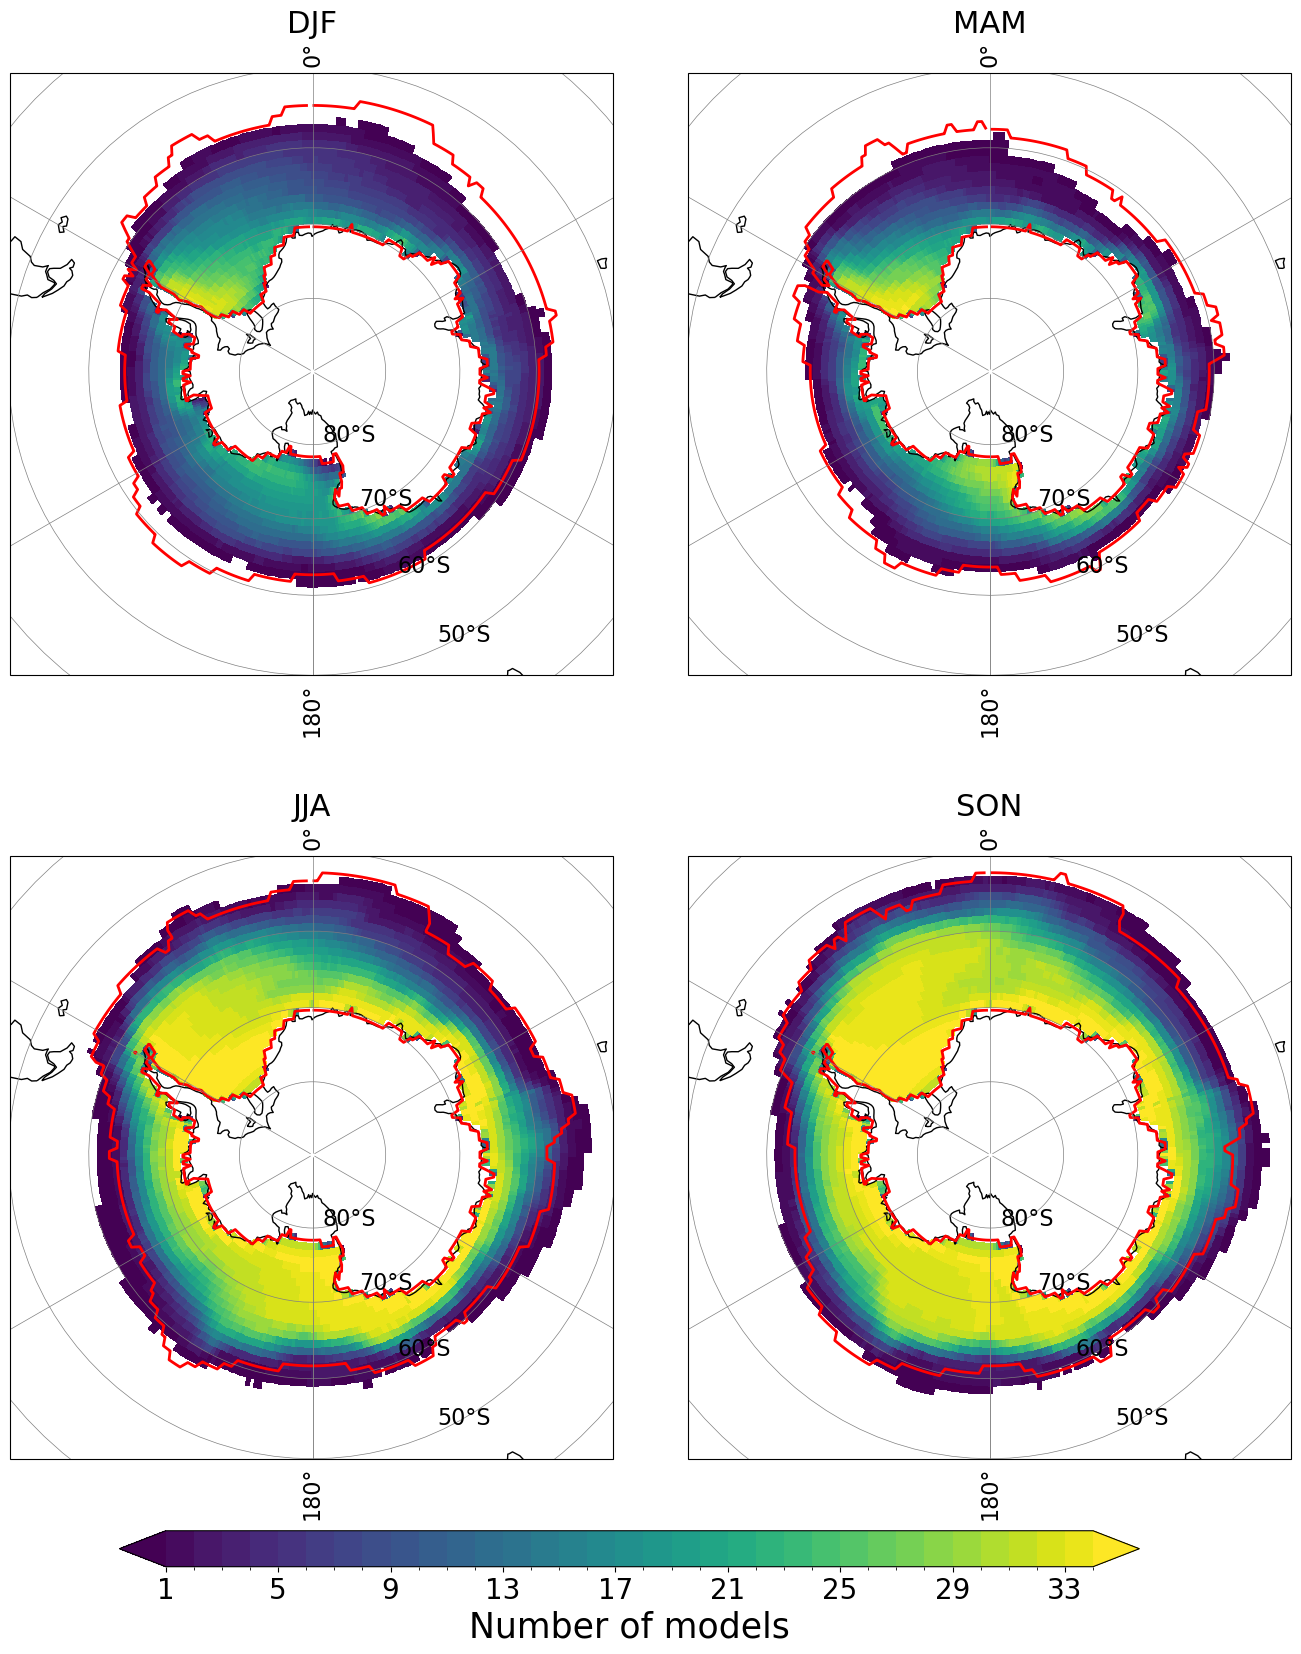

In [37]:
# Dictionnaires des valeurs par saison et référence
seasonal_data = {
    'DJF': seasonal_sum_DJF,
    'MAM': seasonal_sum_MAM,
    'JJA': seasonal_sum_JJA,
    'SON': seasonal_sum_SON
}

reference_data = {
    'DJF': djf_seaice_reference_binary_sh,
    'MAM': mam_seaice_reference_binary_sh,
    'JJA': jja_seaice_reference_binary_sh,
    'SON': son_seaice_reference_binary_sh
}

landmask = sftlf < 50

# figure
fig, axes = plt.subplots(2, 2, figsize=(17, 18), subplot_kw={'projection': ccrs.SouthPolarStereo()})
axes = axes.flatten()

# couleurs
cmap = mpl.cm.viridis
bounds = list(range(1, 35))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

# tracé des 4 saisons
for ax, (season, data) in zip(axes, seasonal_data.items()):
    ref = reference_data[season]
    data_plot = data.where((data > 0) & (landmask))
    
    mesh = ax.pcolormesh(
        data_plot['lon'],
        data_plot['lat'],
        data_plot,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        norm=norm
    )

    # contour de la référence
    contour = ax.contour(
        ref['lon'],
        ref['lat'],
        ref,
        levels=[0.15],  # seuil pour tracer le contour
        colors='red',
        linewidths=2,
        transform=ccrs.PlateCarree()
    )

    ax.set_title(f"{season}", fontsize=22)
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, color='gray', linewidth=0.5, linestyle='-')
    gl.xlabel_style = {'size': 16}
    gl.ylabel_style = {'size': 16}
    ax.set_extent([-180, 180, -50, -90], ccrs.PlateCarree())

# Barre de couleur
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cbar_ax,
    orientation='horizontal'
)
cbar.set_label("Number of models", fontsize=25)
cbar.ax.tick_params(labelsize=20)

# Ajustement mise en page
plt.subplots_adjust(wspace=0.06, hspace=0.3)

#plt.savefig("snow_cover_agreement.png")

plt.show()